## Introduction

Before I start the tasks assigned in the project outline, I am going to import all the libraries, load the dataset and set up a dataframe for which I will use for all the tasks.

## __Imports__

Below are the libraries and packages used for this project.

In [169]:

# I import sklearn to load the datasets.
import sklearn as skl
from sklearn import datasets

# I import r2_score to calculate the r2.
from sklearn.metrics import r2_score

# I import pandas.
import pandas as pd

# import matplotlib.pyplot to plot the data.
import matplotlib.pyplot as plt

# I import Line2D to create a custom legend.	
from matplotlib.lines import Line2D

# I import matplotlib.cm to create a colormap.
import matplotlib.cm as cm

# I import numpy to create arrays.
# See: https://numpy.org/doc/2.2/user/absolute_beginners.html
import numpy as np

#I import seaborn for data visulation.
import seaborn as sns

## Load Dataset

I download the iris data set using SKLEARN. See [Scikit-learn.org](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)

In [170]:
# Load dataset. This command loads the iris data set and its features. 
data = skl.datasets.load_iris()

## Create a Dataframe
To create my DataFrame from the loaded dataset from SKLEARN, I use use pandas. See [pandas.pydata.org](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

In [171]:
# Create DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Outputs a summary of each variable to a single text file.

I am using the df.describe(): function here so that it gives me a summary for dataset. The summary shows statistics to review such as the count, mean, standard deviation, min, max, and quartiles for each feature.  See [pandas.pydata.org](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) for information on df.describe().

In [172]:
# Summerise the data set.
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


I store the results as a variable called summary so I can call back on it later when storing it as a txt file.

In [173]:
# Store the results as a variable
summary = df.describe()

To start converting this to a txt file, I use describe() to produce a table, and then using to_string() to convert it into readable string format. Then I store that string in a variable called summary_txt. See [pandas.pydata.org](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_string.html#) for information on converting a DataFrame to a string.

*Trouble shooting* - got a name error running the below code. Got this as I wasn't working with "DataFrame" anymore. I stored it as the variable "summary" in the cell above, which made the variable summary a  Dataframe. So I needed to to change it to run to_string() correctly.

Found this resource helpful to fix this: [stackoverflow.com](https://stackoverflow.com/questions/66317262/pandas-df-dataframe-is-not-defined#:~:text=That%20NameError%20you%27re%20getting%20happens%20because%20you%27re%20referring,Python%22%20on%20Google%20to%20look%20for%20more%20info.).


In [174]:
# Save the summary to a text file
# summary_txt = DataFrame.to_string()

# NameError: name 'DataFrame' is not defined

In [175]:
# Save the summary to a text file
summary_txt = summary.to_string()


Now I look at finding where I will save the file, file_path = states the path where I want to save the summary file. I have set it so that the file will be saved in the current working directory with the name iris_summary.txt. I used this resource for support on this [www.delftstack.com](https://www.delftstack.com/howto/python/set-file-path-python/).

In [176]:
# Define the path where the file will be saved
file_path = 'iris_summary.txt'

I use the with open() function to open the file and also to make sure the file automatically closes once finished. This is considered a safer way to prevent file corruption  

This opens a file for writing. If the file doesn't exist, it will be created. If it does exist, the content will be overwritten ('w' stands for write mode).

I used this resource for help on file handling [www.geeksforgeeks.org](https://www.geeksforgeeks.org/file-handling-python/).

In [177]:
# Write the summary to the text file
with open(file_path, 'w') as f:
    f.write(summary_txt)


The print function along with the f string will print a message to the terminal, confirming that the summary has been successfully saved to the file. See section 2.4.3. f-strings on  [docs.python.org](https://docs.python.org/3/reference/lexical_analysis.html#f-strings).

In [178]:
print(f"Summary saved to {file_path}")


Summary saved to iris_summary.txt


# Saves a histogram of each variable to png file

To create a histogram, I refer to [Matplotlib Documentation](https://matplotlib.org/stable/plot_types/stats/hist_plot.html#sphx-glr-plot-types-stats-hist-plot-py) I am using the module pyplot to create plots and figures. 

I am also using Numpy to handle the arrays for the dataset, see [numpy.org](https://numpy.org/doc/2.2/user/absolute_beginners.html) for reference.

data holds the features (input variables) of the Iris dataset. It's a 2D array where each row represents an iris flower and each column represents a feature (e.g., sepal length, sepal width, etc.).

In [179]:
# Create a DataFrame from the iris data set
import pandas as pd
from sklearn.datasets import load_iris
# Load data set
iris = load_iris()

data = iris.data


feature_names stores the list of names of the features (i.e., the column names of iris.data). These names correspond to the measurements of the iris flowers, such as sepal length (cm), sepal width (cm), etc.

In [180]:
feature_names = iris.feature_names


Using the plt.figure function creates a new figure, which is like a blank canvas for each histogram.

Using figsize=(6, 4) sets the size of the figure to 6 inches by 4 inches. 

[Matplotlib.org](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html)

Using the plt.hist(data[:, i], ...) function to create a histogram for the feature at index i. 
The data[:, i] slices the dataset to get the i-th column, which reflects the data for a specific feature 

bins= I set the number of bins to 20 

I change the  colours of each histogram to distinguish them from each other. - link in here matplot lib colour maps reference https://matplotlib.org/stable/users/explain/colors/colors.html

[Link] https://www.bing.com/search?pglt=2083&q=Matplotlib+hist()+Function&cvid=b126dbe119e4411db1b38b1c86d2f502&gs_lcrp=EgRlZGdlKgYIABBFGDkyBggAEEUYOTIGCAEQABhAMggIAhDpBxj8VdIBBzg0NmowajGoAgCwAgA&FORM=ANNAB1&PC=U531

Using the function plt.xlabel(feature) to add a label to the x-axis of the histogram. This is set to show the feature data

[Link] https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html

Using the function plt.ylabel("Frequency") to add a label to the y-axis of the histogram. This is set to show the the frequency of the feature's measurements 


[Link] https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html

Using plt.title(f"Histogram of {feature}") to set the titleof the plot. I am using an f - string to add the name of the feature.

[Link] https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html

In [181]:
# Check how the names of the features appear in the dataset.
print(df.columns)


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


I was getting a Key Error:  'sepal lengh (cm)' cell execution error for this line: when I didn't match it to the column names exactly. I used ChatGBT to help me figure this error out - [chatgpt.com](https://chatgpt.com/share/680e8aeb-0284-8012-94af-cb39c6dba68d)

To plot this histograms, I refer to the [Matplotlib Histogram Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) for guidance as well as looking at a resource on [Geeksforgeeks.org](https://www.geeksforgeeks.org/plotting-histogram-in-python-using-matplotlib/). To start, I look at using subplots to create grids [See pyplot.subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html). I set it to 2x2 and I set the figsize to 10 x 8 as I believe that will give me a good size to view the data. 

To set the title, I use the function set_title and name the histograms what feature name it will be generating [See set_title](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html). I set the label for the x-axis to show which feature name I am looking at [See set_x_label](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html). Then I set the label for the y-axis to measure the frequency of the feature [See set_y_label](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html).

I also set different colours of each of the histogram to distinguish them from each other. 

I use the Matplotlib function tight.layout() [See Pyplot tight_layout Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html) to adjust the spacing between the plots and make sure there is no overlap of the titles, axis, data etc. It makes the histogram tidier. 

Then to render the histogram in the Jupyter Notebook, I use plt.show() [See Pyplot Show](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html). 


KeyError: 'sepal_length'

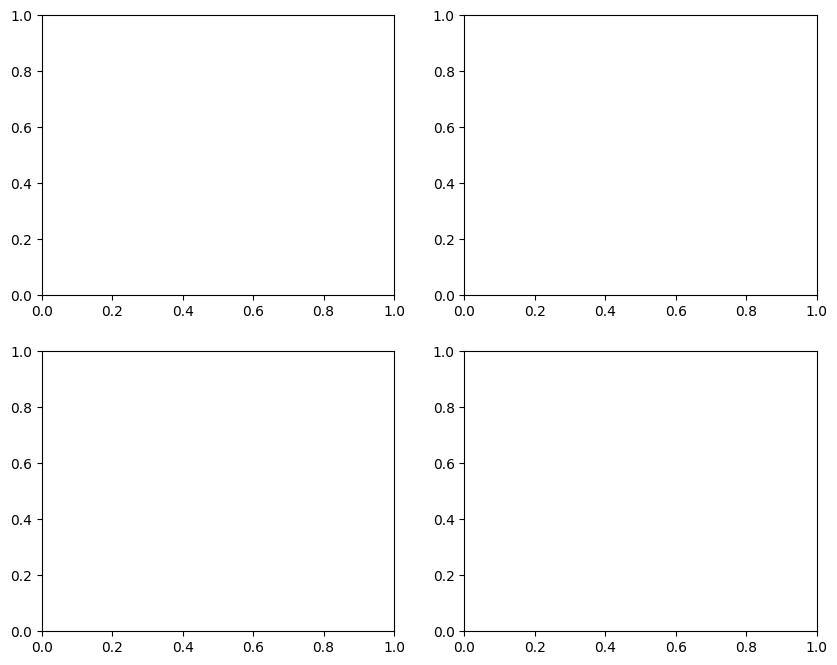

In [182]:
# Plot histograms for each feature.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # Create a 2x2 grid of subplots

# Plot each feature's histogram.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

axes[0, 0].hist(df['sepal_length'], bins=20, color='skyblue', edgecolor='blue')

# Set the title.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html

axes[0, 0].set_title('Sepal Length (cm)')

# Set the x-axis.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html

axes[0, 0].set_xlabel('Sepal Length (cm)')

# Set the y-axis.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html

axes[0, 0].set_ylabel('Frequency')

# Repeat the above steps for the remaining 3 features, changing colours of each histogram to distinguish them from each other.

axes[0, 1].hist(df['sepal_width'], bins=20, color='lightpink', edgecolor='purple')
axes[0, 1].set_title('Sepal Width (cm)')
axes[0, 1].set_xlabel('Sepal Width (cm)')
axes[0, 1].set_ylabel('Frequency')

axes[1, 0].hist(df['petal_length'], bins=20, color='coral', edgecolor='red')
axes[1, 0].set_title('Petal Length (cm)')
axes[1, 0].set_xlabel('Petal Length (cm)')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(df['petal_width'], bins=20, color='lightgreen', edgecolor='green')
axes[1, 1].set_title('Petal Width (cm)')
axes[1, 1].set_xlabel('Petal Width (cm)')
axes[1, 1].set_ylabel('Frequency')



# Adjust layout to prevent overlap
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html

plt.tight_layout()


# Save the histogram as a png.
plt.savefig('Histogram.png')

# Show the plots
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html

plt.show()

## Analysis from Histogram

Sepal Lengh vs Sepal Width: Width is smaller than lenght. 

Petal lenght vs Petal width: width is smaller than petal length but still shows variability.


## Scatterplots

To create the scatter plot, I start by loading the target classes and storing them as a variable to call on in the scatterplot. I set the fig size first before plotting the scatterplot. I refer to the [Matplotlib Scatterplot Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) but I also found [W3Schools Matplotlib Scatter](https://www.w3schools.com/python/matplotlib_scatter.asp) a useful resource, particularly for the colour map and colour schemes. [Matplotlib Colour Maps](https://matplotlib.org/stable/users/explain/colors/colormaps.html) was an additional resource I used for the colour maps.

I c=target in plt.scatter() to color-code the points according to the target labels. Cmap gives us the colour scheme, I chose plasma. Edgecolour is the colour surrounding the bins, k is black. The s parameter in plt.scatter() allows me to adjust the size of the markers used to represent the data points. 

Then I set my title, x-axis and y-axis like I have done in the above task. I chose the two features; sepel length and petal lenght and  label the x-axis and y-axis to reflect this. [See set_title](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html), [set_x_label](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html) and [set_y_label](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html).

/tmp/ipykernel_16882/551628966.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colourmap = cm.get_cmap('plasma', 3)


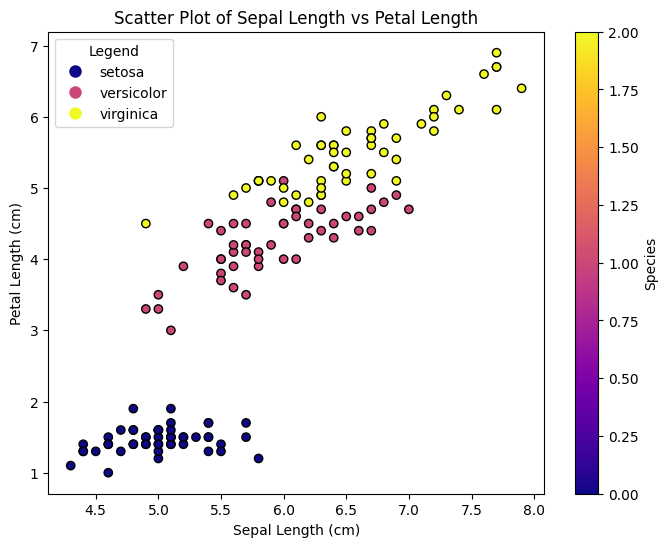

In [ ]:
# Import libraries from matplotlib.

# Using Line2D for this to colour code the legend.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html
from matplotlib.lines import Line2D

# Using cm to create the color map.
# See: https://matplotlib.org/stable/tutorials/colors/colormaps.html
import matplotlib.cm as cm

# Import necessary libraries from scikit-learn and pandas.
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

# Load the iris dataset properly to access attributes like .target and .target_names.
# See: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
data = load_iris()

# Create a DataFrame from the data for easier plotting.
# See: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
df = pd.DataFrame(data.data, columns=data.feature_names)

# Store the target classes data as a variable to call on in the scatterplot.
# See: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
target_classes = data.target

# Set the figsize.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html
plt.figure(figsize=(8, 6)) 

# Generate a scatter plot using two chosen features; sepal length and petal length.
# Add color-coding based on the target classes.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
# See: https://www.w3schools.com/python/matplotlib_scatter.asp
plt.scatter(df['sepal length (cm)'], df['petal length (cm)'], c=target_classes, cmap='plasma', edgecolor='black')

# Custom legend using Line2D.
# Colourmap will set the colours of the data in the legend. It is set to plasma to match the scatter plot.
# 3 is the number of colour for the legend, to match the amount of species in the dataset.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html
colourmap = cm.get_cmap('plasma', 3)

# Create custom legend elements to label the species and colour code it.
# Each Line2D object represents one item in the legend.
# Marker='o' means it shows a circular dot which will match the scatter plot).
# Markerfacecolor sets the color of the dot using the colormap for each species.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_markeredgecolor

legend_elements = [
    Line2D([0], [0], marker='o', color='w',
           label=data.target_names[0],
           markerfacecolor=colourmap(0 / 2), markersize=10),
    Line2D([0], [0], marker='o', color='w',
           label=data.target_names[1],
           markerfacecolor=colourmap(1 / 2), markersize=10),
    Line2D([0], [0], marker='o', color='w',
           label=data.target_names[2],
           markerfacecolor=colourmap(2 / 2), markersize=10),
]

# Add the legend to the plot.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
plt.legend(handles=legend_elements, title="Legend")

# Set the title.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html
plt.title("Scatter Plot of Sepal Length vs Petal Length")

# Set the x-axis.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html
plt.xlabel("Sepal Length (cm)")

# Set the y-axis.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html
plt.ylabel("Petal Length (cm)")

# Add a color bar to indicate the Iris Species.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html
plt.colorbar(label='Species')

# Show the plot.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html
plt.show()


## Scatterplot Analyis


Setosa is on its own

Veriscolour and Virgina overlap


add a regression line here to this scatter plot 

## __Linear Regression__

_"In statistics, linear regression is a model that estimates the relationship between a scalar response (dependent variable) and one or more explanatory variables (regressor or independent variable)."_

[en.wikipedia.org](https://en.wikipedia.org/wiki/Linear_regression)

I was struggling to understand some resources on Linear Regression as they were very heavy in mathmathical language, so I referred to a [Datacamp.com Tutorial](https://www.datacamp.com/tutorial/simple-linear-regression), used [ChatGBT](https://chatgpt.com/share/68121392-b24c-8012-9970-1d746b84fbb6) as a starting point for me to apply this to scatterplots. I also went back over lecture notes as well. NOTE __Check over chat gbt link that it works__ 

## __Linear Regression Formula__

$y=mx+b$ 

or 

$y=m*x+b$ ( y equals m multiplied by x plus b)

Broken down this means:

- y is the dependent variable (what it's predicting),

- x is the independent variable (input),

- m is the slope (how much y changes with x),

- b is the intercept (value of y when x = 0).


I am going to convert this in the code by using:


y_predicted = slope * x + intercept


I used [ChatGBT](https://chatgpt.com/share/6814a84b-04f8-8012-934a-c13033bc4829) for help converting the formula to this code. NOTE **CHECK OVER LINK**

Which will mean that:

x is the input value the sepal length,

y_predicted is the predicted output value, the petal length.

I am using this Linear Regression Line on the scatter plot to see when I am given a certain sepal length, what petal length should I expect to see.

To do this , I replicate my scatter plot from above and add the linear regression line. I found [geeksforgeeks.org](https://www.geeksforgeeks.org/numpys-polyfit-function-a-comprehensive-guide/#1-linear-fit) and [data36.com](https://data36.com/linear-regression-in-python-numpy-polyfit/) helpful on understanding how to use polyfit for linear regression lines. 


## Adding a Regression line for the scatterplot to investigate correlation between the features. 

Strength of Relationship :

If the points lie close to the regression line, it suggests a strong linear relationship between the two features.

A wider scatter indicates a weaker relationship.

Direction of Relationship:

An upward-sloping line indicates a positive correlation: as one feature increases, the other tends to increase.

A downward-sloping line indicates a negative correlation.

Predictive Potential:

If the relationship is strong and linear, it implies that one feature could be used to predict the other (e.g. petal length predicting petal width).

https://www.technologynetworks.com/informatics/articles/linear-regression-396146#D1

https://www.w3schools.com/python/python_ml_linear_regression.asp

/tmp/ipykernel_16882/715795165.py:46: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colourmap = cm.get_cmap('plasma', 3)


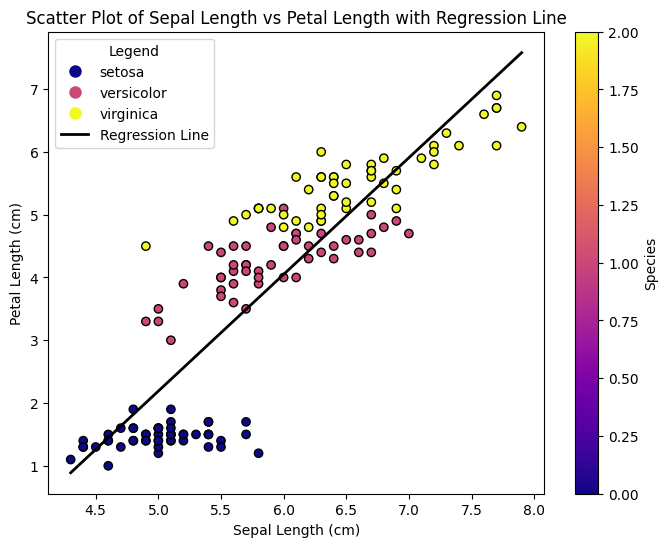

In [ ]:
# Set figure size,

plt.figure(figsize=(8, 6))

# Scatter plot: Sepal Length vs Petal Length.

plt.scatter(df['sepal length (cm)'], df['petal length (cm)'], c=target_classes, cmap='plasma', edgecolor='black')

# Fit a regression line using numpy.polyfit.
# See: https://numpy.org/doc/stable/reference/numpy.polyfit.html

# Store the sepal lenght data as an x variable.

x = df['sepal length (cm)']

# Store the petal lenght data as a y variable.

y = df['petal length (cm)']

# Fit a linear regression line (degree 1) to the data.
# np.polyfit will fit a straight line of 1 degree to x and y.
# Slope is how steep the line will be.
# Intercept is where the line will cross y.

slope, intercept = np.polyfit(x, y, 1)

# Create an x range using linspace.
# See: https://numpy.org/doc/stable/reference/generated/numpy.linspace.html

x_range = np.linspace(x.min(), x.max())

# This is the equation of a line: y = mx + b
# This gives us the height (y) of the line at each x value in x_range.
# y_predicted is the predicted y value for each x in x_range.
y_predicted = slope * x_range + intercept


# Plot the regression line
plt.plot(x_range, y_predicted, color='black', linewidth=2)

# Custom legend using Line2D.
# Colourmap will set the colours of the data in the legend. It is set to plasma to match the scatter plot.
# 3 is the number of colour for the legend, to match the amount of species in the dataset.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html

colourmap = cm.get_cmap('plasma', 3)  


# Create custom legend elements to label the species and the regression line.
# Each Line2D object represents one item in the legend.
# Marker='o' means it shows a circular dot which will match the scatter plot).
# Markerfacecolor sets the color of the dot using the colormap for each species.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html
# See https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_markeredgecolor

legend_elements = [
    Line2D([0], [0], marker='o', color='w',
           label=data.target_names[0],
           markerfacecolor=colourmap(0 / 2), markersize=10),
    Line2D([0], [0], marker='o', color='w',
           label=data.target_names[1],
           markerfacecolor=colourmap(1 / 2), markersize=10),
    Line2D([0], [0], marker='o', color='w',
           label=data.target_names[2],
           markerfacecolor=colourmap(2 / 2), markersize=10),
    Line2D([0], [0], color='black', lw=2, label='Regression Line')
]

# Add the legend to the plot.
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html

plt.legend(handles=legend_elements, title="Legend")

# Set plot title and axis labels.

# Set the title.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html

plt.title("Scatter Plot of Sepal Length vs Petal Length with Regression Line")

# Set the x-axis.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html

plt.xlabel("Sepal Length (cm)")

# Set the y-axis.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html

plt.ylabel("Petal Length (cm)")

# Add a color bar to indicate the Iris Species.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html

plt.colorbar(label='Species')

# Show the final plot.
plt.show()

## Coefficeint of Determination 

_"The coefficient of determination is a number between 0 and 1 that measures how well a statistical model predicts an outcome."_ [www.scribbr.com](https://www.scribbr.com/statistics/coefficient-of-determination/)

Coefficient of determination or rather R Squarred Value range meaning is as follows:

- 0	The model does not predict the outcome.
- Between 0 and 1	The model partially predicts the outcome.
- 1	The model perfectly predicts the outcome.



I replicate the scatterplot with the linear regression line to look for the coefficeint of determination. I use R2_Score to calculate this for me. See [scikit-learn.org](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) and [www.geeksforgeeks.org](https://www.geeksforgeeks.org/how-to-calculate-r2-with-scikit-learn/)


X = iris.data will store the extracted Features (sepal_length, sepal_width, petal_length, petal_width)

Y = iris.target will store the extracted labels( species)

/tmp/ipykernel_16882/1797983520.py:81: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colourmap = cm.get_cmap('plasma', 3)


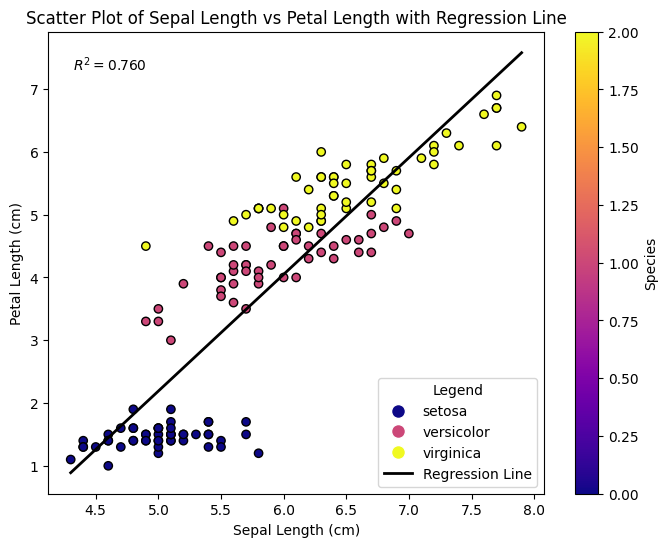

In [ ]:
# Load the Iris dataset.
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
target_classes = data.target

# Set figure size,
plt.figure(figsize=(8, 6))

# Scatter plot: Sepal Length vs Petal Length.
plt.scatter(df['sepal length (cm)'], df['petal length (cm)'], c=target_classes, cmap='plasma', edgecolor='black')

# Fit a regression line using numpy.polyfit.
# See: https://numpy.org/doc/stable/reference/numpy.polyfit.html

# Store the sepal length data as an x variable.
x = df['sepal length (cm)']

# Store the petal length data as a y variable.
y = df['petal length (cm)']

# Fit a linear regression line (degree 1) to the data.
# np.polyfit will fit a straight line of 1 degree to x and y.
# Slope is how steep the line will be.
# Intercept is where the line will cross y.

slope, intercept = np.polyfit(x, y, 1)

# Create an x range using linspace.
# See: https://numpy.org/doc/stable/reference/generated/numpy.linspace.html

x_range = np.linspace(x.min(), x.max())

# This is the equation of a line: y = mx + b
# This gives me the height (y) of the line at each x value in x_range.
# y_predicted is the predicted y value for each x in x_range.

y_predicted = slope * x_range + intercept

# Calculate predicted y values using the fitted model for original x values.

y_fit = slope * x + intercept

# Calculate R2 (coefficient of determination).
# This will show how the regression line fits the data.
# See: https://en.wikipedia.org/wiki/Coefficient_of_determination

# Sum of squared errors between actual and predicted y values.
squared_error = np.sum((y - y_fit) ** 2) 

# Total variance in y from its mean.
total_variance = np.sum((y - np.mean(y)) ** 2)  


# calculate R-squared using sklearn's r2_score for comparison.
# See: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
# See: https://www.geeksforgeeks.org/how-to-calculate-r2-with-scikit-learn/

r_squared_sklearn = r2_score(y, y_fit)

# Plot the regression line.

plt.plot(x_range, y_predicted, color='black', linewidth=2)

# Annotating the R² value on the plot.
# I set the text to appear in the top-left corner of the plot.
# plt.gca() gets the current plot's Axes object.
# See: https://www.geeksforgeeks.org/matplotlib-pyplot-gca-in-python/
# transform=plt.gca().transAxes means I am placing the text using a coordinate system 
# where (0, 0) is the bottom-left and (1, 1) is the top-right **of the plot area**,
# s0 0.05, 0.95 means the text will be placed at 5% from the left and 95% from the bottom of the plot area.
# This makes sure the text stays in the same spot even if the data or axes limits change.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html

plt.text(0.05, 0.95, f"$R^2 = {r_squared_sklearn:.3f}$", transform=plt.gca().transAxes, verticalalignment='top')

# Custom legend using Line2D.
# Colourmap will set the colours of the data in the legend. It is set to plasma to match the scatter plot.
# 3 is the number of colour for the legend, to match the amount of species in the dataset.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html

colourmap = cm.get_cmap('plasma', 3)  

# Create custom legend elements to label the species and the regression line.
# Each Line2D object represents one item in the legend.
# Marker='o' means it shows a circular dot which will match the scatter plot).
# Markerfacecolor sets the color of the dot using the colormap for each species.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html
# See https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_markeredgecolor

legend_elements = [
    Line2D([0], [0], marker='o', color='w',
           label=data.target_names[0],
           markerfacecolor=colourmap(0 / 2), markersize=10),
    Line2D([0], [0], marker='o', color='w',
           label=data.target_names[1],
           markerfacecolor=colourmap(1 / 2), markersize=10),
    Line2D([0], [0], marker='o', color='w',
           label=data.target_names[2],
           markerfacecolor=colourmap(2 / 2), markersize=10),
    Line2D([0], [0], color='black', lw=2, label='Regression Line')
]

# Add the legend to the plot.
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html

plt.legend(handles=legend_elements, title="Legend")

# Set plot title and axis labels.

# Set the title.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html

plt.title("Scatter Plot of Sepal Length vs Petal Length with Regression Line")

# Set the x-axis.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html
plt.xlabel("Sepal Length (cm)")

# Set the y-axis.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html

plt.ylabel("Petal Length (cm)")

# Add a color bar to indicate the Iris Species.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html

plt.colorbar(label='Species')

# Show
plt.show()


## Analysis for $R^2$


As I can see the R2 value is 0.76 which means there is a strong positive relationship between sepal length and petal length.

## Box Plot

I refer to [Geeksforgeeks.org](https://www.geeksforgeeks.org/box-plot-visualization-with-pandas-and-seaborn/) for information on Boxplots as well as refer to the [Offical Seaborn Documentation](https://seaborn.pydata.org/generated/seaborn.load_dataset.html). I am using seaborn as i think it make it look nicer.

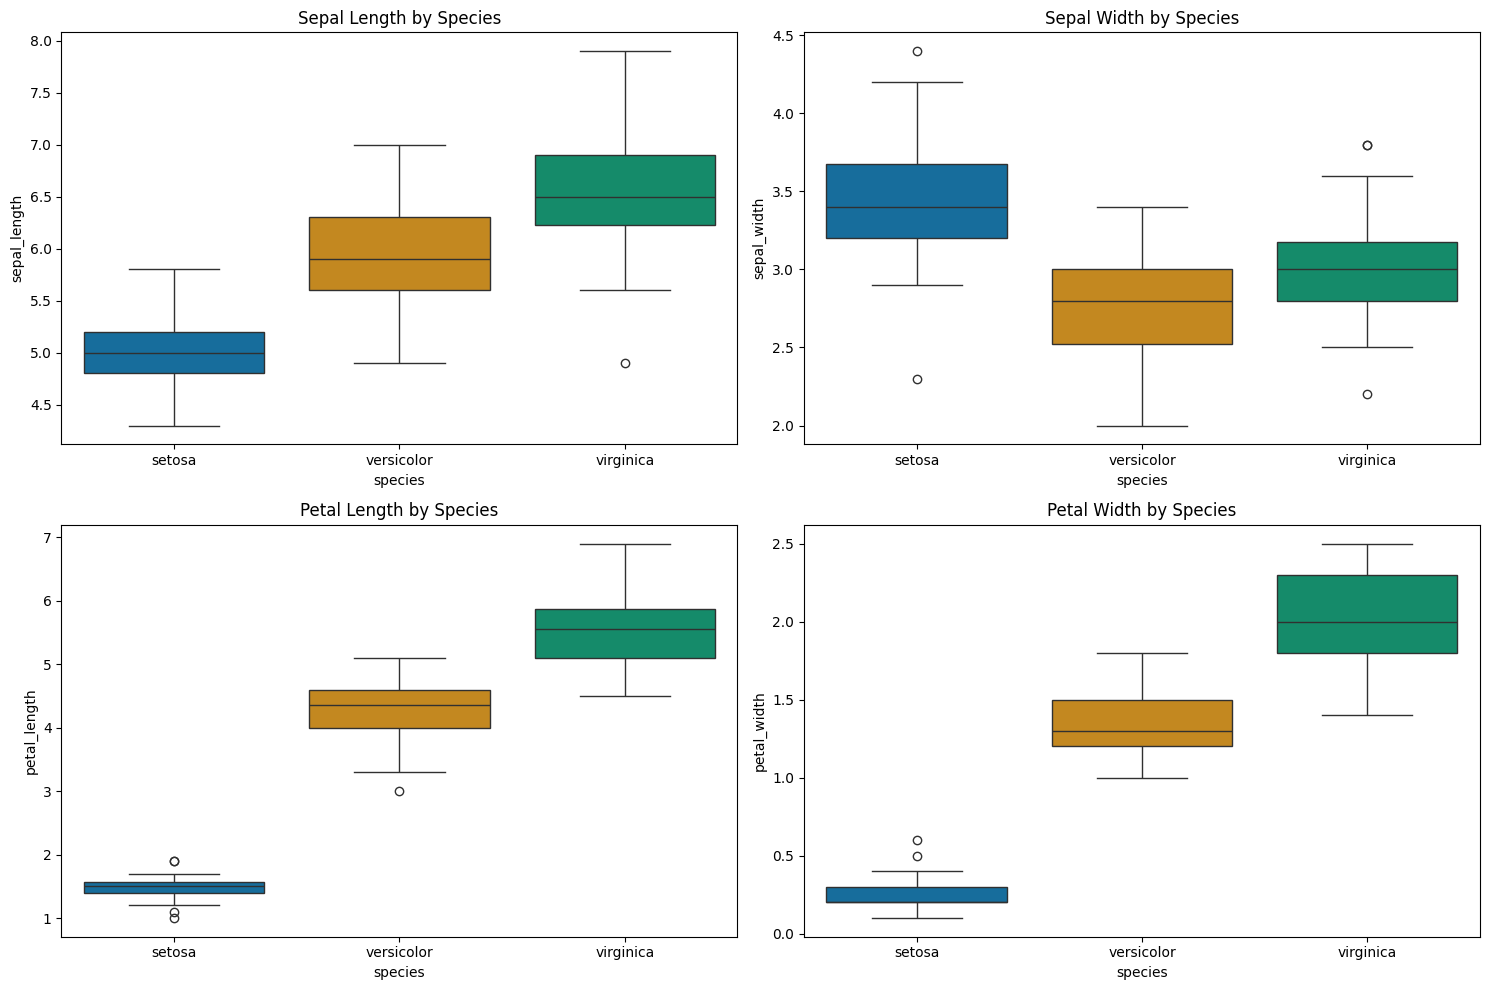

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset.
# See: https://seaborn.pydata.org/generated/seaborn.load_dataset.html.
# This will load the iris dataset from seaborn's built-in datasets.
iris = sns.load_dataset("iris")

# Define the features to plot.
# See: https://seaborn.pydata.org/tutorial/axis_grids.html

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Create the figure.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html
# I am setting the figure size to 15x10 inches.
# I believe this will be a good size for showing the four subplots.

plt.figure(figsize=(15, 10))

# Manually create subplots for each feature.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html
# I am using a 2x2 grid of subplots.
# I am going to use seaborn's boxplot function to create the boxplots as I like the colours in them.
# See: https://seaborn.pydata.org/tutorial/axis_grids.html
# See: https://seaborn.pydata.org/tutorial/boxplot.html

# Each subplot will generate a boxplot of the feature against the species.

# The first subplot generates the sepal length for each species.

# I am using the Colourblind palette to make it more accessible.
# See: https://seaborn.pydata.org/tutorial/color_palettes.html

plt.subplot(2, 2, 1)
sns.boxplot(data=iris, x='species', y=features[0], hue="species", palette="colorblind")
plt.title(f'{features[0].replace("_", " ").title()} by Species')

# The second subplot generates the sepal width for each species.

plt.subplot(2, 2, 2)
sns.boxplot(data=iris, x='species', y=features[1],hue="species", palette="colorblind")

plt.title(f'{features[1].replace("_", " ").title()} by Species')

# The third subplot generates the petal length for each species.

plt.subplot(2, 2, 3)
sns.boxplot(data=iris, x='species', y=features[2], hue="species", palette="colorblind")
plt.title(f'{features[2].replace("_", " ").title()} by Species')

# The fourth subplot generates the petal width for each species.

plt.subplot(2, 2, 4)
sns.boxplot(data=iris, x='species', y=features[3], hue="species", palette="colorblind")	
plt.title(f'{features[3].replace("_", " ").title()} by Species')

# Adjust the layout to prevent overlap.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html
# This will make sure the subplots are nice and tidy and not going to interfere with each other.

plt.tight_layout()

# Show the boxplots.

plt.show()


 ## Why choose a box plot for analaysis ? 


I can see the distribution for each of the features and for each of the Flower Species

Each box plot shows the median, quartiles, and potential outliers for each flower and feature.

Median is the middle line of the box, this will give the central tendency.

Box is the interquartile range and it will show the spread of the middle 50% of data.

Whiskers will suggest  the spread of the data (excluding outliers).

Dots will highlight outliers. As we can see, the iris setosa has a much smaller petal lenght than the other two and it shows up as a dot outside the whiskers.


https://wellbeingatschool.org.nz/information-sheet/understanding-and-interpreting-box-plots

https://stackoverflow.com/questions/66395848/boxplot-what-do-the-dots-represent

## Analysis 


Setosa is usually distinct: especially in petal length and petal width, where it forms a non-overlapping distribution with the others. As I can see, the iris setosa has a much smaller petal lenght than the other two and it shows up as a dot outside the whiskers.

Versicolor and Virginica often overlap, but Virginica tends to have larger values for most features.


Petal length and petal width are highly discriminative Setosa is completely separate.

Sepal width has more overlap, especially between species — it’s likely a weaker predictor.


From the above graph, we can see that – 

Species Setosa has the smallest features and less distributed with some outliers.
Species Versicolor has the average features.
Species Virginica has the highest features

## Heatmap

## Correlation Coefficients

_"The Pearson correlation coefficient (r) is the most common way of measuring a linear correlation. It is a number between –1 and 1 that measures the strength and direction of the relationship between two variables."_ [www.scribbr.com](https://www.scribbr.com/statistics/pearson-correlation-coefficient/)


Correlation Value range meaning is as follows:

- +1.0	Perfect positive correlation (they increase together)
- 0	No correlation (no clear relationship)
- -1.0	Perfect negative correlation (one increases, the other decreases)


Looking at the heatmap I can see that the Petal length is highly correlated with petal width and sepal length; sepal length is negatively correlated with the other three features.

[www.atlassian.com](https://www.atlassian.com/data/charts/heatmap-complete-guide#:~:text=Petal%20length%20is%20highly%20correlated%20with%20petal%20width%20and%20sepal%20length%3B%20sepal%20length%20is%20negatively%20correlated%20with%20the%20other%20three%20variables.)

Plamsa is a good colour blind option high contrast colours, staying away from green and red (most common colour blindness) and using blue, purple and yellow.

Go into further detail on CORR - maybe add numbers on the grids? Is that possible, need to research

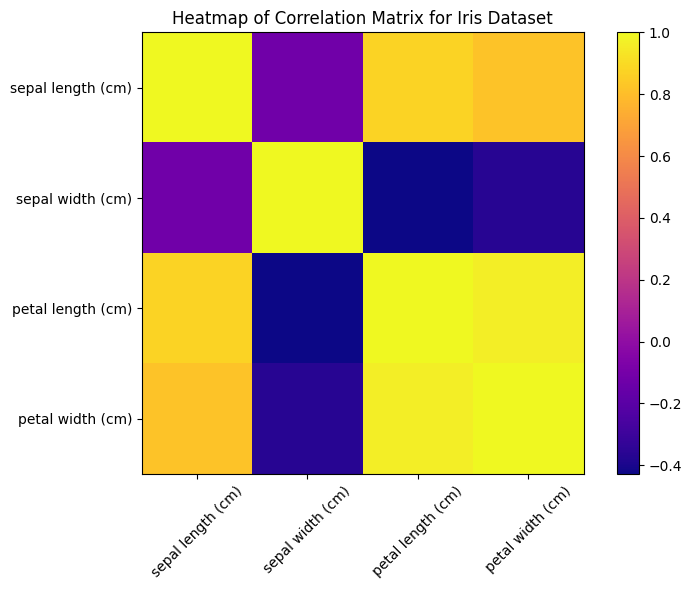

In [ ]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the iris dataset.
# See: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
iris = load_iris()

#convert the data into a Pandas Dataframe
# adds columns based off the feature names from the data

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Using the corr() function to calculate correlations between columns in the DF. 
# See: https://www.geeksforgeeks.org/python-pandas-dataframe-corr/

corr_matrix = df.corr()

# Set the figure size.
plt.figure(figsize=(8, 6))  

# Create the heatmap using the imshow() function.
# See: https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html
# Using the cmap 'PiYG' to choose pink and green colours for the heatmap.
# See: https://matplotlib.org/stable/tutorials/colors/colormaps.html
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html

plt.imshow(corr_matrix, cmap='plasma', interpolation='none')  

# Add a color bar.

plt.colorbar()  

# Set the x axis ticks.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html

plt.xticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)

# Set the y-axis ticks.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yticks.html

plt.yticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns)

# Set a title and show.

plt.title('Heatmap of Correlation Matrix for Iris Dataset')

# Adjust layout for better spacing.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html

plt.tight_layout()  

# Show the heatmap.

plt.show()


## Analysis from HeatMap

From the above graph, we can see that –

Petal width and petal length have high correlations. 
Petal Width and Sepal length have good correlations.

Include what doesnthave good correlations

This green pink not good for colour blind redo 

I am using Seaborns paramater colour blind to set the palatte as  colorblind-friendly, see [Seaborn Documentation Colour Palattes](https://seaborn.pydata.org/tutorial/color_palettes.html#:~:text=Seaborn%20in%20fact%20has%20six%20variations%20of%20matplotlib%E2%80%99s%20palette%2C%20called%20deep%2C%20muted%2C%20pastel%2C%20bright%2C%20dark%2C%20and%20colorblind.).

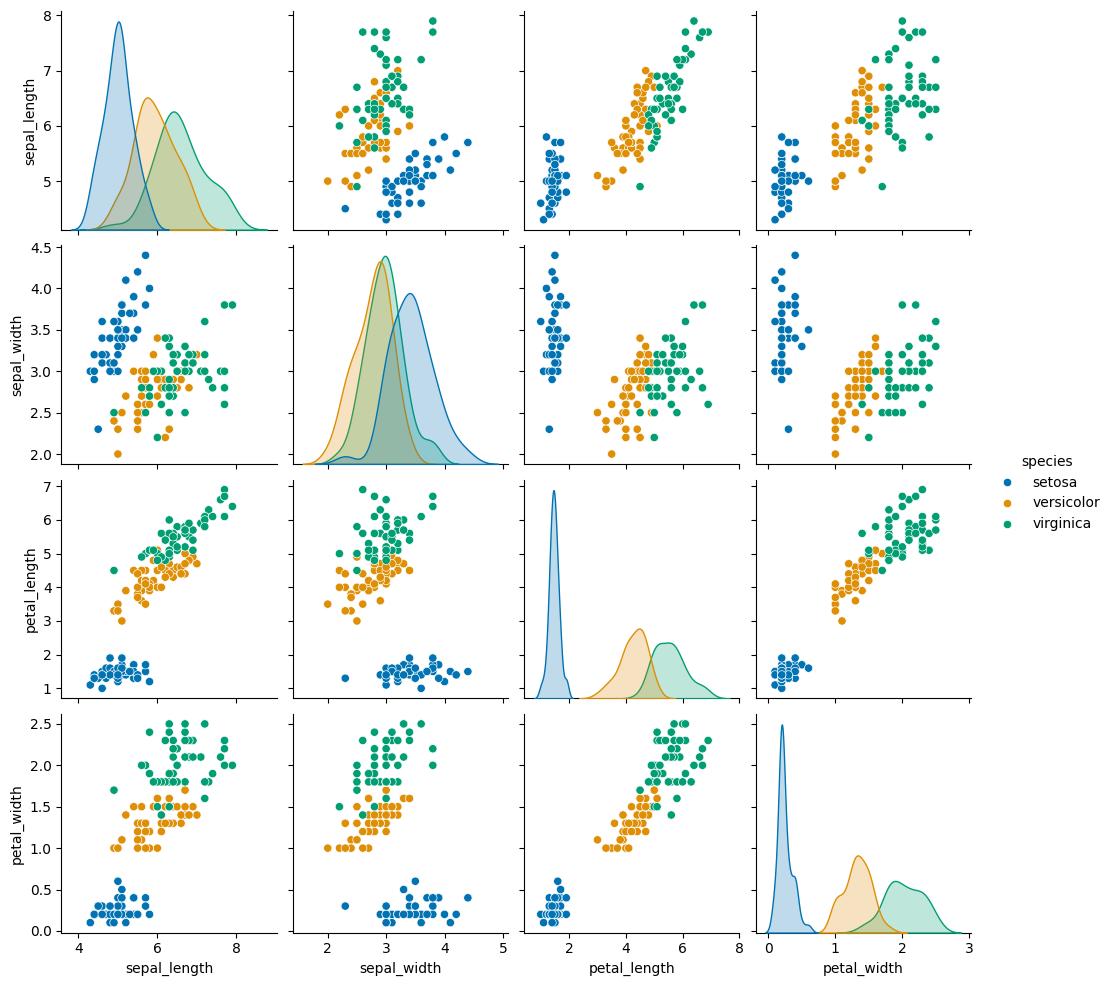

In [ ]:
# I am going to load the iris dataset for seaborn.
# See: https://seaborn.pydata.org/generated/seaborn.load_dataset.html
df = sns.load_dataset("iris")

# Create the pair plot. 
# I set the colour palette as one that is colorblind-friendly.
sns.pairplot(df, hue="species", palette="colorblind")

plt.show()



## Analysis from Pair Plot




## Violin Plot

__Why use it ?__

It does a great job of showing the distribution shape. Compared to the box plot, a violin plot shows the full probability density. I can see if values are skewed, clustered.

It gives me clearer insight into the variability of the categories. I can check how spread out some of the values are.

It includes a box plot inside that shows the median and quartiles. It then adds a Kernel Density Estimate around it.

So it makes it useful for comparing features. 


__Limitations__

Can be hard to understand for people without technical background.

Doesnt show outliers as clearly as box plot where they are marked in points



__Best to use__

Useful when understanding spread and density matters more than spotting outliers

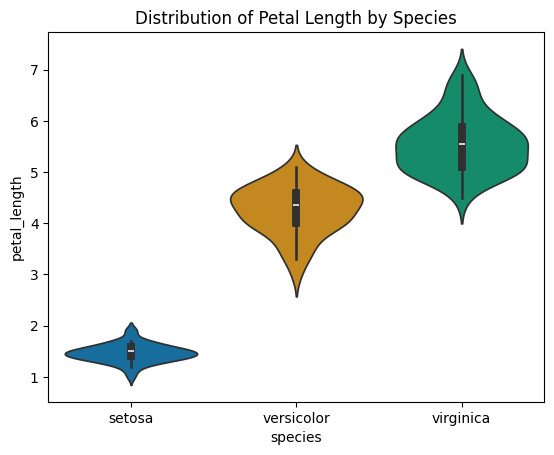

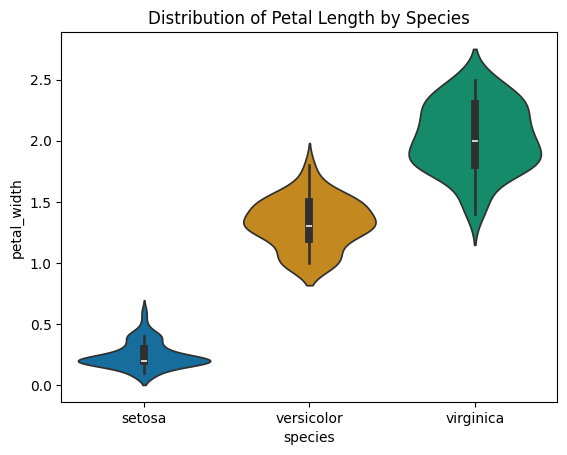

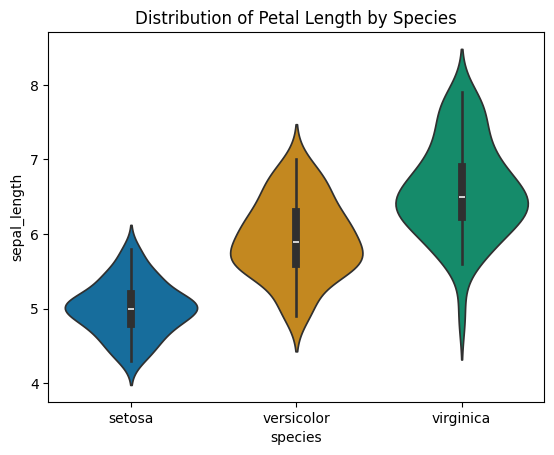

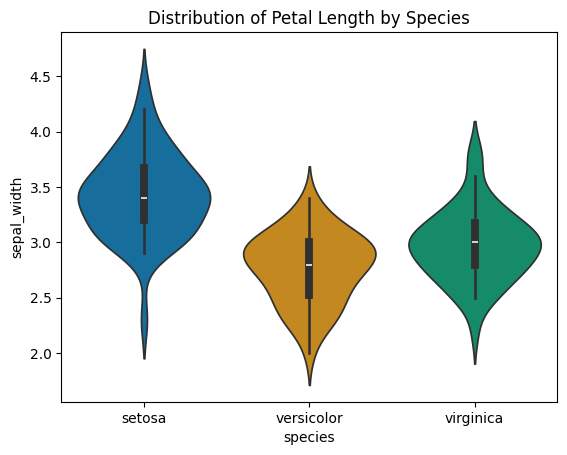

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset("iris")

# Create a violin plot to show the distribution of petal length by species.
# See: https://seaborn.pydata.org/tutorial/violinplots.html
sns.violinplot(data=iris, x="species", y="petal_length",hue="species", palette="colorblind")
plt.title("Distribution of Petal Length by Species")
plt.show()

# Create a violin plot to show the distribution of petal length by species.
# See: https://seaborn.pydata.org/tutorial/violinplots.html
sns.violinplot(data=iris, x="species", y="petal_width",hue="species", palette="colorblind")
plt.title("Distribution of Petal Length by Species")
plt.show()

# Create a violin plot to show the distribution of petal length by species.
# See: https://seaborn.pydata.org/tutorial/violinplots.html
sns.violinplot(data=iris, x="species", y="sepal_length", hue="species", palette="colorblind")
plt.title("Distribution of Petal Length by Species")
plt.show()

# Create a violin plot to show the distribution of petal length by species.
# See: https://seaborn.pydata.org/tutorial/violinplots.html
sns.violinplot(data=iris, x="species", y="sepal_width", hue="species", palette="colorblind")
plt.title("Distribution of Petal Length by Species")
plt.show()



## Analyis from Violin Plot 

Petal lengths differ dramatically across the three iris species, revealing that setosa has short petals with low variation, while virginica shows more spread.